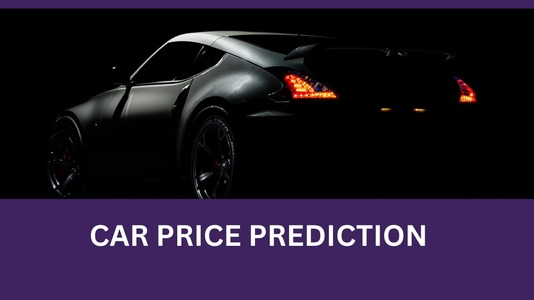

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d1=pd.read_csv(r"C:\Users\ADMIN\Desktop\Oasis\car data.csv")
d1.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Data Preprocessing

### Five point summary

In [4]:
d1.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
d1.describe(include='O')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


### null value treatment

In [6]:
d1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

there are no null values

### outlier treatment

In [7]:
q1=d1.quantile(0.25)
q3=d1.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
d2=d1[~(((d1>ul)|(d1<ll)).any(axis=1))]


In [8]:
d2.shape

(264, 9)

In [9]:
d1.shape

(301, 9)

from the above we can see that there are huge outliers so i left it untreated

# Data Visualization

### Univariant Analysis

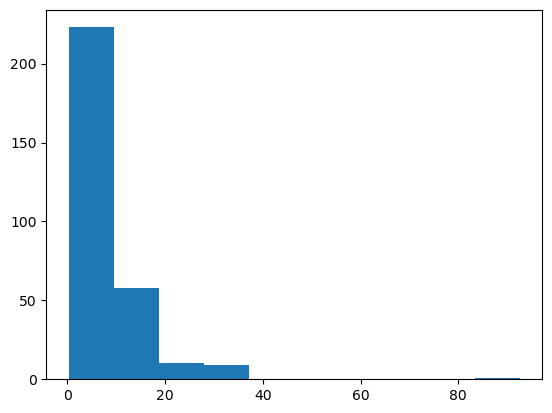

In [10]:
plt.hist(d1['Present_Price'])
plt.show()

present _price is right skewed

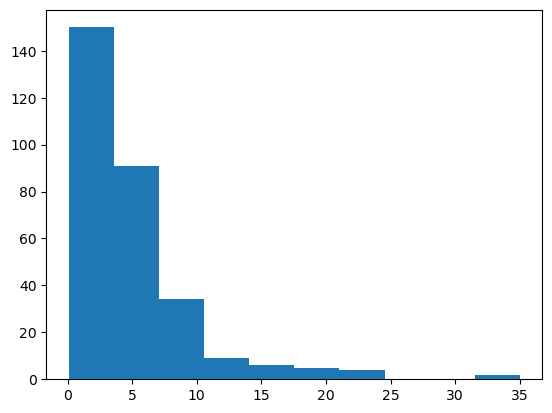

In [11]:
plt.hist(d1['Selling_Price'])
plt.show()

selling price is also right skewed

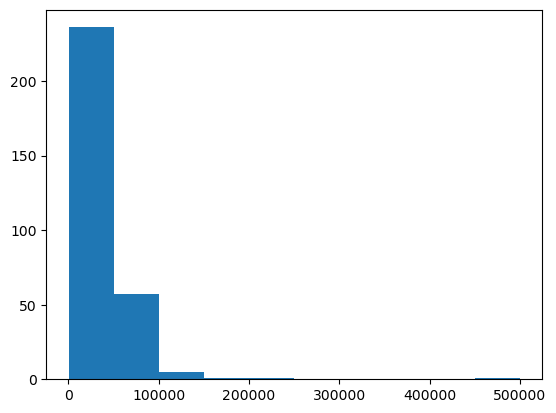

In [12]:
plt.hist(d1['Driven_kms'])
plt.show()

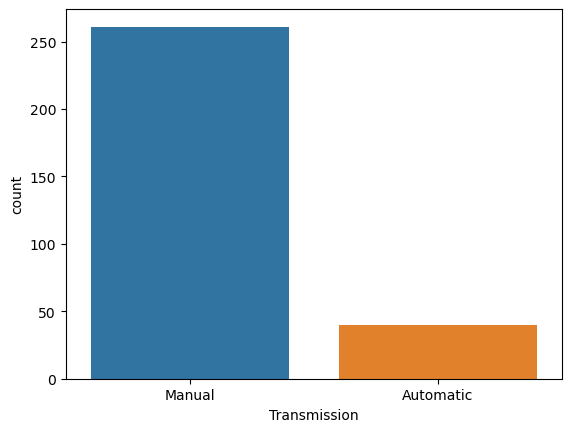

In [13]:
sns.countplot(x=d1['Transmission'])
plt.show()

most of the cars are manual transmission cars

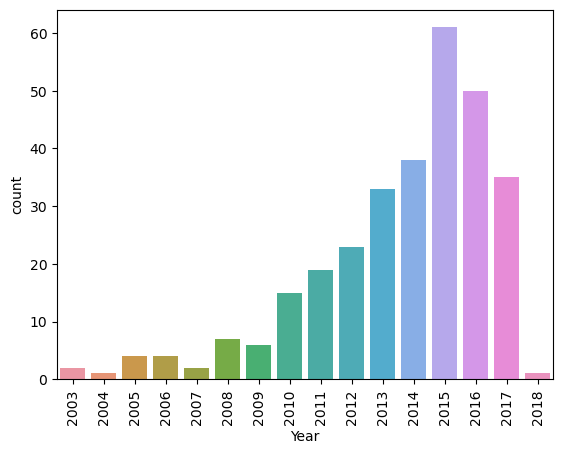

In [14]:
sns.countplot(x=d1['Year'])
plt.xticks(rotation=90)
plt.show()

2015 sees more sales of cars

### Bivariant Analysis

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

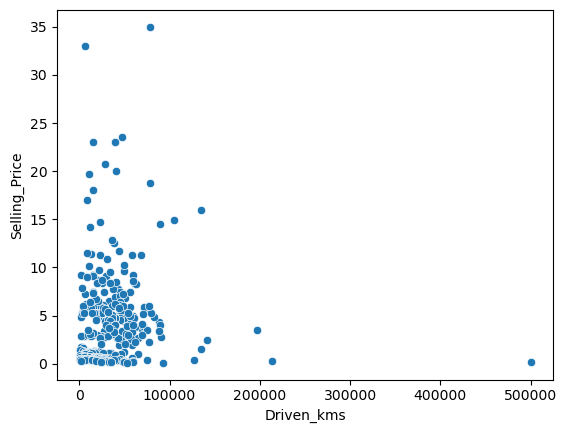

In [15]:
sns.scatterplot(x=d1['Driven_kms'],y=d1['Selling_Price'])

selling price and Driven kms have no relationship with Driven_kms

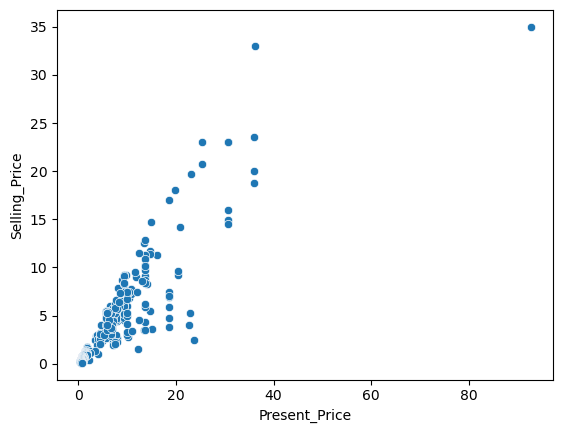

In [16]:
sns.scatterplot(x=d1['Present_Price'],y=d1['Selling_Price'])
plt.show()

present price and selling price are having linear relationship

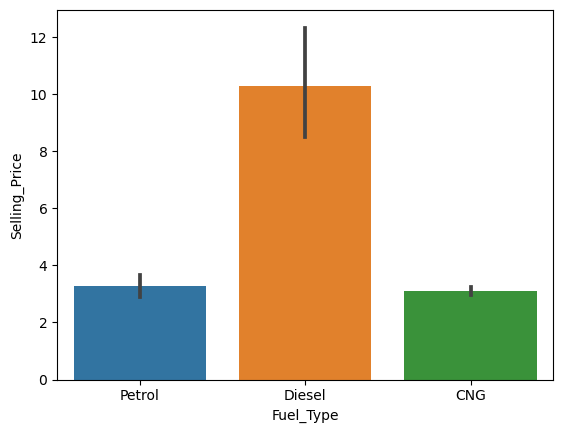

In [17]:
sns.barplot(x=d1['Fuel_Type'],y=d1['Selling_Price'])
plt.show()

Diesel type cars are more in the sale

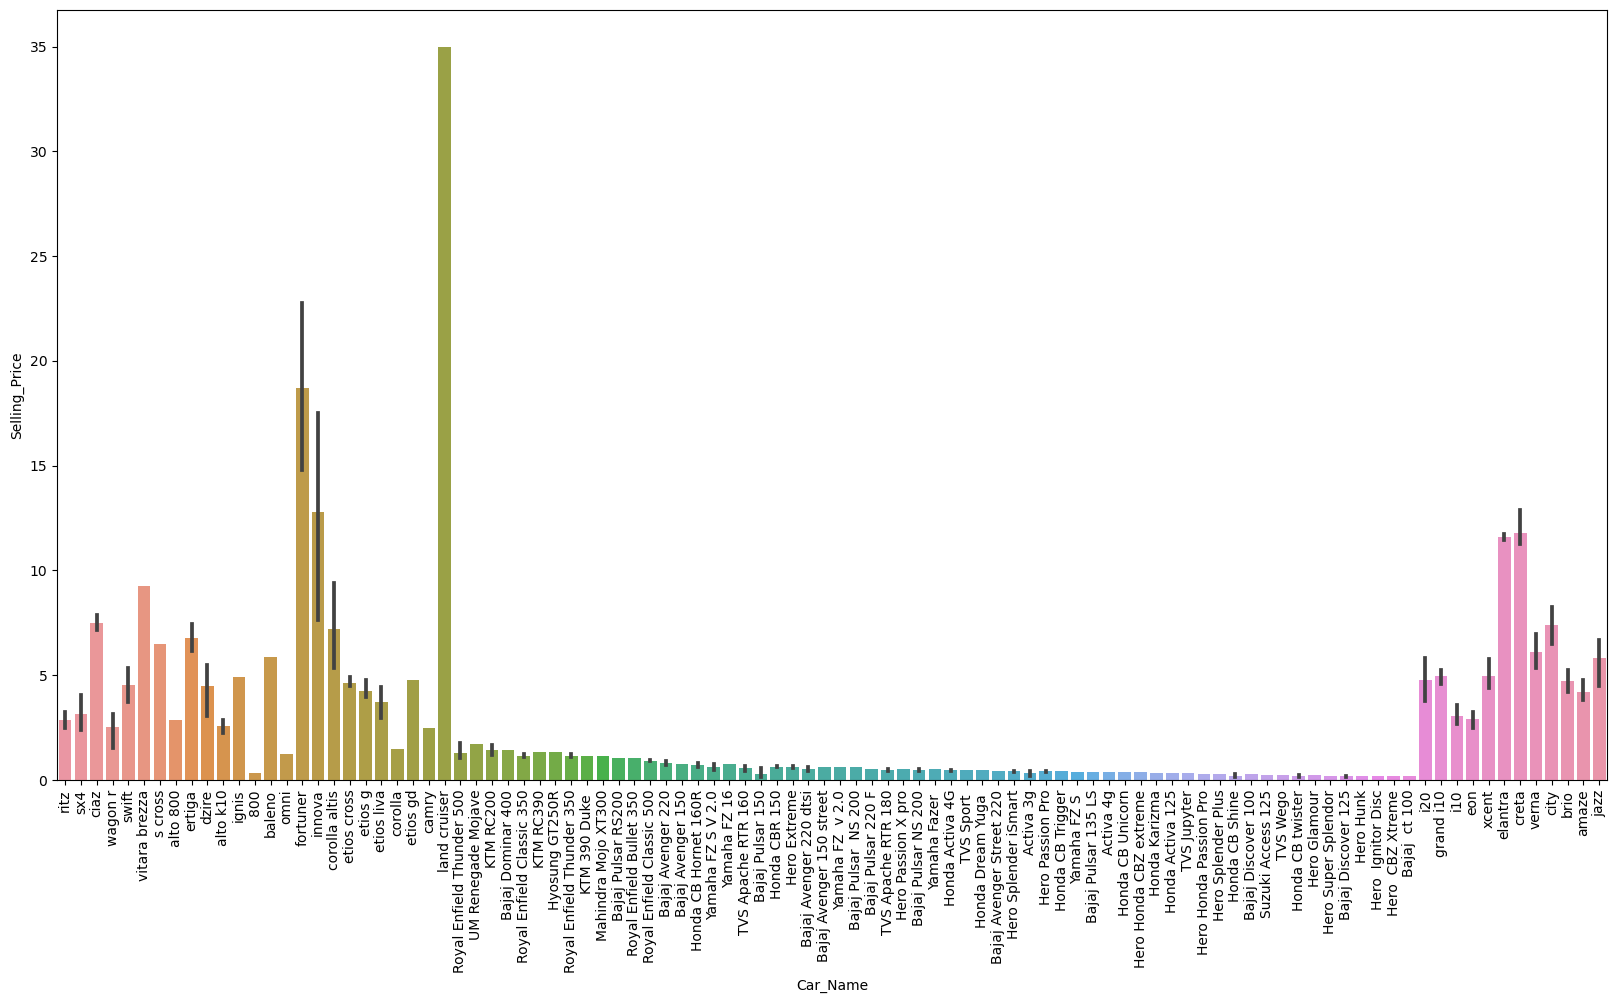

In [18]:
plt.figure(figsize=[20,10])
sns.barplot(x=d1['Car_Name'],y=d1['Selling_Price'])
plt.xticks(rotation=90)
plt.show()

land cruiser goes for the highest price in the sales

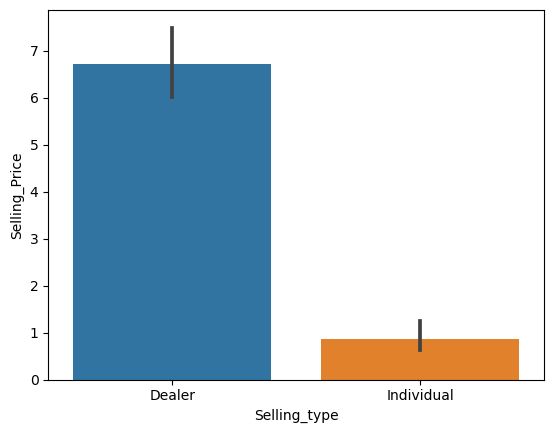

In [19]:
sns.barplot(x=d1['Selling_type'],y=d1['Selling_Price'])
plt.show()

most of the cars in the sakes are done by the dealer

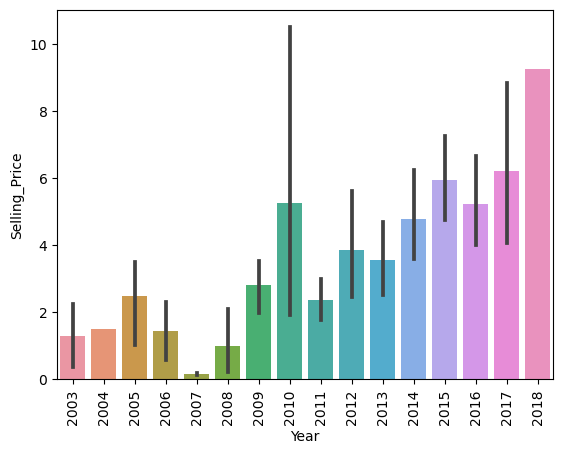

In [20]:
sns.barplot(x=d1['Year'],y=d1['Selling_Price'])
plt.xticks(rotation=90)
plt.show()

Selling price is high in 2018 but no variation but in 2010 the variation within the selling price is huge this indicates that more variety of cars are sold in the year 2010

### Multivariant Analysis

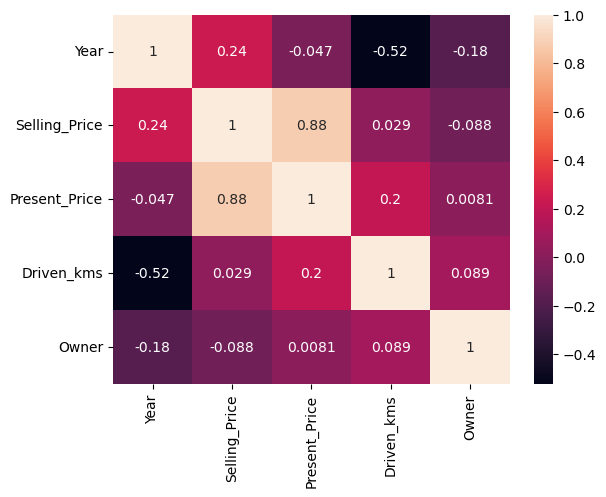

In [21]:
sns.heatmap(d1.corr(),annot=True)
plt.show()

### Skewnwss

In [22]:
d1.skew()

Year            -1.246189
Selling_Price    2.493422
Present_Price    4.085409
Driven_kms       6.436013
Owner            7.616850
dtype: float64

there are skewness in the dataset so i am going to use transformation techniques to reduce the skewness

### Transformation

In [23]:
from sklearn.preprocessing import PowerTransformer

In [24]:
d1.select_dtypes(include=np.number)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [25]:
pt=PowerTransformer()
d1['Driven_kms']=pt.fit_transform(d1[['Driven_kms']])

In [26]:
d1['Present_Price']=pt.fit_transform(d1[['Present_Price']])

In [27]:
d1['Selling_Price']=pt.fit_transform(d1[['Selling_Price']])

In [28]:
d1['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [29]:
d1.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,0.100531,0.114601,-0.048000,Petrol,Dealer,Manual,0
1,sx4,2013,0.443461,0.641981,0.491784,Diesel,Dealer,Manual,0
2,ciaz,2017,0.877321,0.674756,-1.284583,Petrol,Dealer,Manual,0
3,wagon r,2011,-0.051660,-0.159585,-1.487803,Petrol,Dealer,Manual,0
4,swift,2014,0.411260,0.313142,0.475904,Diesel,Dealer,Manual,0


In [30]:
d1.skew()

Year            -1.246189
Selling_Price    0.016530
Present_Price   -0.007050
Driven_kms       0.079532
Owner            7.616850
dtype: float64

In [39]:
d1['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

### Encoding

In [31]:
d1.select_dtypes(include='O')

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()
d1['Car_Name']=le.fit_transform(d1['Car_Name'])

In [34]:
d1['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [35]:
d1['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)

In [36]:
d1['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [42]:
d1['Year']=le.fit_transform(d1['Year'])

In [44]:
d1['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [46]:
d1['Selling_type'].replace({'Dealer':0,'Individual':1},inplace=True)

In [48]:
d1['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [50]:
d1['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)

# Model Building

### statistical model

In [63]:
x=d1.drop("Selling_Price",axis=1)
y=d1['Selling_Price']

In [64]:
import statsmodels.api as sm
xc=sm.add_constant(x)

In [65]:
xc

,const,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1.0,90,11,0.114601,-0.048000,0,0,0,0
1,1.0,93,10,0.641981,0.491784,1,0,0,0
2,1.0,68,14,0.674756,-1.284583,0,0,0,0
3,1.0,96,8,-0.159585,-1.487803,0,0,0,0
4,1.0,92,11,0.313142,0.475904,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,1.0,69,13,0.844235,0.210342,1,0,0,0
297,1.0,66,12,0.165924,0.922950,0,0,0,0
298,1.0,69,6,0.788860,1.468907,0,0,0,0
299,1.0,69,14,0.922665,-1.078722,1,0,0,0


In [66]:
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1123.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          2.55e-214
Time:                        16:00:01   Log-Likelihood:                 93.382
No. Observations:                 301   AIC:                            -168.8
Df Residuals:                     292   BIC:                            -135.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8683      0.079    -10.942      0.000      -1.024      -0.712
Car_Name          0.0010      0.001      1.272      0.204      -0.001       0.002
Year              0.0792      0.005     16.490      0.000       0.070       0.089
Present_Price     0.8404      0.022     37.598      0.000       0.796       0.884
Driven_kms       -0.0445      0.015     -3.023      0.003      -0.074      -0.016
Fuel_Type         0.1441      0.029      5.044      0.000       0.088       0.200
Selling_type     -0.1777      0.050     -3.588      0.000      -0.275      -0.080
Transmission      0.0281      0.033      0.852      0.395      -0.037       0.093
Owner            -0.1090      0.044     -2.504      0.013      -0.195      -0.023
==============================================================================
Omnibus:                        8.579   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.464
Skew:                          -0.305   Prob(JB):                      0.00881
Kurtosis:                       3.618   Cond. No.                         565.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumption 1: Multicollinearity

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [68]:
vf=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns,columns=['vif'])

,vif
const,58.411168
Car_Name,3.413224
Year,1.781625
Present_Price,4.633718
Driven_kms,2.012207
Fuel_Type,1.368282
Selling_type,5.190689
Transmission,1.158123
Owner,1.075822


Here there is moderate multicollinearity

### Assumption 2:Normality

In [69]:
residuals=model.resid

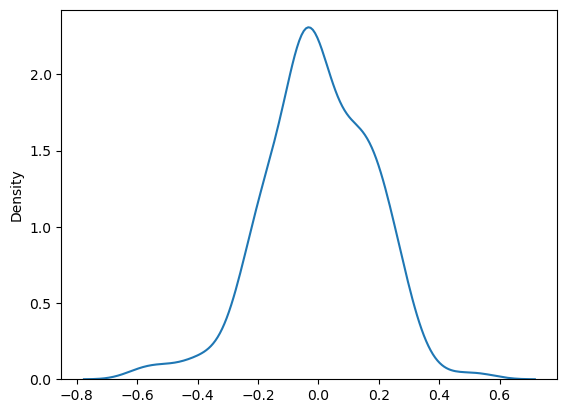

In [70]:
sns.kdeplot(residuals)
plt.show()

In [72]:
from scipy import stats

In [73]:
print(stats.jarque_bera(residuals))

SignificanceResult(statistic=9.463933148021786, pvalue=0.008809130187795158)


 from the plot and p_value in the jarquebera test , we can tell that the residuals are not normal

### asssumption 3: Homoscedasticity of Residuals

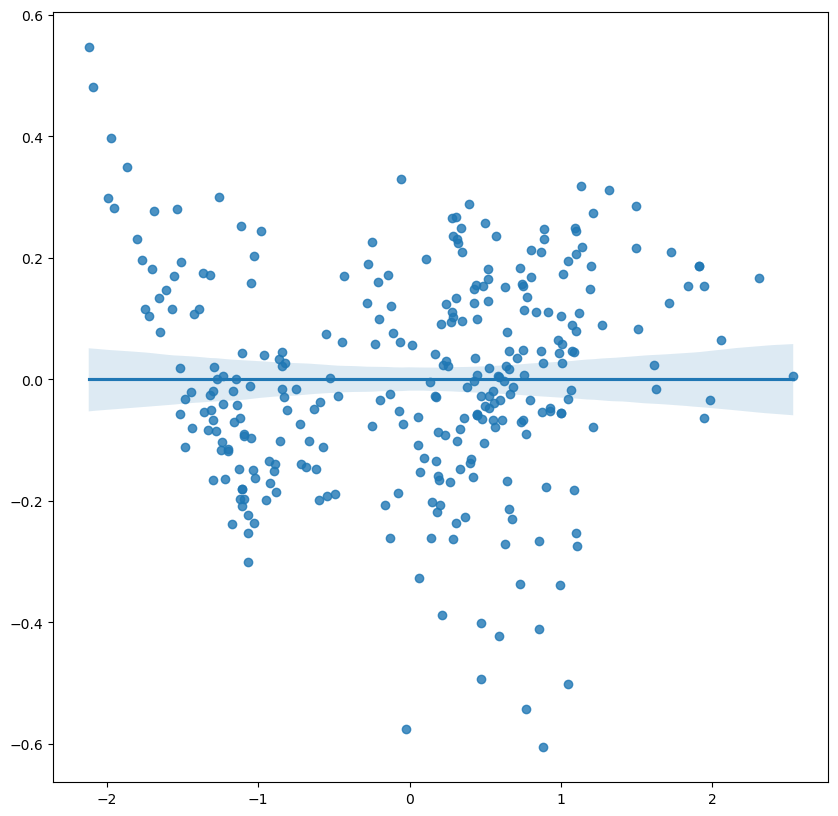

In [74]:
residuals=model.resid
y_pred=model.predict(xc)
plt.figure(figsize=(10,10))
sns.regplot(x=y_pred,y=residuals)
plt.show()

In [75]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y=model.resid,x=xc)

(0.7231189941226105, 0.9725692018656179, 'increasing')

from the plot and goldfeldquantd test we can tell that the residuals are not homoscedastic

### Assumption 4: Auto-correlation of Residuals

In [76]:
residuals=model.resid
import statsmodels.tsa.api as smt

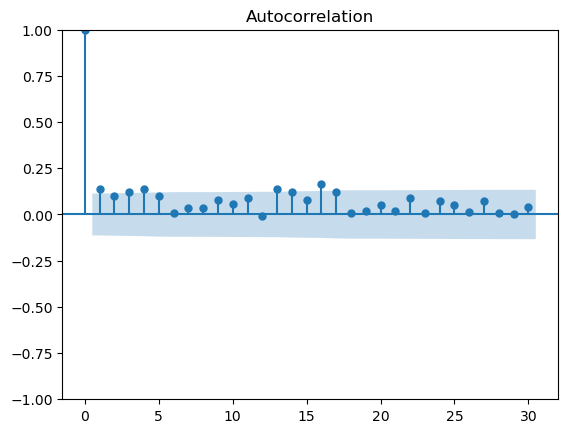

In [77]:
smt.graphics.plot_acf(residuals,lags=30)
plt.show()

In [78]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

1.7245396083573363

here there is no autocorrelation among the residuals

### Assumption 5: Linearity

In [80]:
sm.stats.diagnostic.linear_rainbow(model)

(1.102802724015186, 0.2784354195001279)

the datas are linear

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

In [83]:
from sklearn.metrics import r2_score,mean_squared_error

In [84]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

y_pred_train=lr.predict(xtrain)
y_pred_test=lr.predict(xtest)

r2_train=r2_score(ytrain,y_pred_train)
r2_test=r2_score(ytest,y_pred_test)

train_mse=mean_squared_error(ytrain,y_pred_train)
test_mse=mean_squared_error(ytest,y_pred_test)

train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

res_lr=[r2_train,r2_test,train_rmse,test_rmse]
res_lr

[0.97023090769186, 0.9549937938894175, 0.17513539868658456, 0.1990521361859143]

In [85]:
results_1=pd.DataFrame()

In [86]:
results_1.index = [' R2 Train','R2 Test','RMSE Train', 'RMSE Test']

In [87]:
results_1['Base model']=res_lr

In [88]:
results_1.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Base model,0.970231,0.954994,0.175135,0.199052


From the above moded we can predict the car price of the given data with 97% correct prediction